## Import module

In [ ]:
!pip install python-mnist
from google.colab import drive
drive.mount("/content/gdrive")
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
import math
import time
np.random.seed(11)
from mpl_toolkits.mplot3d import Axes3D
from mnist import MNIST
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

Mounted at /content/gdrive


## Init functions for K-means

In [ ]:
# FORGY APPROACH (FA)
def kmeans_init_randomly_centers(data, k):
    start = time.time()
    print('FORGY APPROACH (FA)')
    # randomly pick k rows of data as initial centers
    print(round(time.time() - start, 5))
    return data[np.random.choice(data.shape[0], k, replace=False)]


# K-MEANS++
def kmeans_init_kmeansPlusPlus(data, k): 
    start = time.time()
    print('K-MEANS++')
    # initialize the centroids list and add a randomly selected data point to the list 
    centroids = [] 
    centroids.append(data[np.random.randint(data.shape[0]), :]) 
    if k < 4:
        plot(data, np.array(centroids))
    # compute remaining k - 1 centroids 
    for c_id in range(k - 1):
        dist = []
        for centroid in centroids:
          dist.append(list(map(lambda x: math.sqrt(sum(x)), (data - centroid)**2)))
        dist = np.array(dist).T
        # index of the closest center
        dist = np.array(list(map(lambda x: min(x), dist)))
        # select data point with maximum distance as our next centroid 
        next_centroid = data[np.argmax(dist)] 
        centroids.append(next_centroid)
        if k < 4:
            plot(data, np.array(centroids)) 
    print(round(time.time() - start, 5))
    return np.array(centroids)

# RANDOM K CLUSTERS
def kmeans_init_randomly_k_clusters(data, k):
    start = time.time()
    print('RANDOM K CLUSTERS')
    centroids = []
    # randomly separate rows of data as k clusters
    size_data = len(data)
    while True:
      clusters_random = np.random.randint(k, size = size_data)
      if len(set(clusters_random)) == k:
          break
    for i in range(k):
      cluster = data[clusters_random == i]
      centroids.append(np.mean(cluster, axis = 0))
    print(round(time.time() - start, 5))
    return np.array(centroids)

# MACQUEEN APPROACH (MA) 
def kmeans_init_MA(data, k):
    start = time.time()
    print('MACQUEEN APPROACH (MA)')
    # randomly pick k rows of data as initial centers
    choice_index = np.random.choice(data.shape[0], k, replace=False)
    centroids = np.array(data[choice_index], dtype='f')
    data = np.delete(data,choice_index,axis=0)
    # save current mean (centroids) of each cluster and num of member of k clusters
    meta_centroids = [1] * k
    for item in data:
        d = np.array(list(map(lambda x: math.sqrt(sum(x)), (centroids - item)**2)))
        # index of the closest center
        index_centroid = np.argmin(d)
        # update centroids and prepare for next interator
        centroids[index_centroid] = (centroids[index_centroid] * meta_centroids[index_centroid] + item) / (meta_centroids[index_centroid] + 1)
        meta_centroids[index_centroid] += 1
    print(round(time.time() - start, 5))
    return centroids

# KAUFMAN APPROACH (KA) 
def kmeans_init_KA(data, k):
    start = time.time()
    print('KAUFMAN APPROACH (KA)')
    dist = []
    for item in data:
        dist.append(sum(list(map(lambda x: math.sqrt(sum(x)), (data - item)**2))))
    medoid =  data[np.argmin(dist)]
    selected_seed = np.array([medoid])
    while len(selected_seed) < k:
        Cji = []
        for wi in data:
            sub_Cji = 0
            for wj in data:
                Dj = min(list(map(lambda x: math.sqrt(sum(x)), (selected_seed - wj)**2)))
                sub_Cji += max(Dj - np.linalg.norm(wi-wj), 0)
            Cji.append(sub_Cji)
        while True:
            index = np.argmax(np.array(Cji))
            prepare_selected_seed = data[index]
            if list(prepare_selected_seed) not in selected_seed.tolist():
                break
            Cji[index] = 0
        selected_seed = np.append(selected_seed, [prepare_selected_seed], axis=0)
    print(round(time.time() - start, 5))
    return selected_seed


## K-means and other functions

In [ ]:
# function for plot
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',  
                color = 'gray', label = 'data points') 
    plt.scatter(centroids[:-1, 0], centroids[:-1, 1],  
                color = 'black', label = 'previously selected centroids') 
    plt.scatter(centroids[-1, 0], centroids[-1, 1],  
                color = 'red', label = 'next centroid') 
    plt.title('Select % d th centroid'%(centroids.shape[0])) 
    plt.legend() 
    plt.show() 

def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.axis('equal')
    plt.plot()
    plt.show()

def plot_Iris_Dataset_2D_3D(X, labels):
    # plot 2D
    kmeans_display(X, labels)

    # plot 3D
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=160)
    ax.scatter(X[:, 3], X[:, 1], X[:, 2], c=labels, cmap=plt.cm.Set1, edgecolor='k', s=40)
    ax.set_title("Iris Dataset")
    ax.set_xlabel(iris.feature_names[3])
    ax.w_xaxis.set_ticklabels([])
    ax.set_ylabel(iris.feature_names[1])
    ax.w_yaxis.set_ticklabels([])
    ax.set_zlabel(iris.feature_names[2])
    ax.w_zaxis.set_ticklabels([])
    plt.show()
    
# function support for k-means
def kmeans_assign_labels(init_function, X, centers):
    # calculate distances btw data and centers
    k = len(centers)
    while True:
        d = []
        for center in centers:
          d.append(list(map(lambda x: math.sqrt(sum(x)), (X - center)**2)))
        d = np.array(d).T
        # index of the closest center
        d = np.array(list(map(lambda x: np.argmin(x), d)))
        # sometime some centers not have any instances so init again with same init k-means
        if len(set(d)) == k:
            break
        centers = init_function(X, k)
    return d

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))
    
def SSE(X, labels):
    SSErr = 0
    for i in range(len(set(labels))):
        Xi = X[labels == i, :]
        centeri = np.mean(Xi, axis = 0)
        SSErr += sum(list(map(lambda x: math.sqrt(sum(x)), (Xi - centeri)**2)))
    print('Error Sum of Squares: ', round(SSErr, 5))
    
def kmeans(init_function, X, K):
    centers = init_function(X, K)
    labels = []
    it = 0 
    while True:
        labels = kmeans_assign_labels(init_function, X, centers)
        new_centers = kmeans_update_centers(X, labels, K)
        if has_converged(centers, new_centers):
            break
        centers = new_centers
        it += 1
    return (centers, labels, it)

# **IRIS FLOWER dataset**

## **Show origin Iris Dataset**

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_X = iris.data
iris_y = iris.target
print('Number of classes: ' , len(np.unique(iris_y)))
print('Number of data points: ' , len(iris_y))

X0 = iris_X[iris_y == 0,:]
print('\nSamples from class 0:\n', X0[:5,:])

X1 = iris_X[iris_y == 1,:]
print('\nSamples from class 1:\n', X1[:5,:])

X2 = iris_X[iris_y == 2,:]
print('\nSamples from class 2:\n', X2[:5,:])

Number of classes:  3
Number of data points:  150

Samples from class 0:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Samples from class 1:
 [[7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]]

Samples from class 2:
 [[6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]]


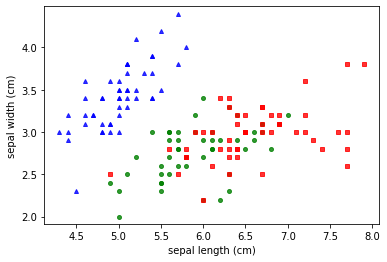

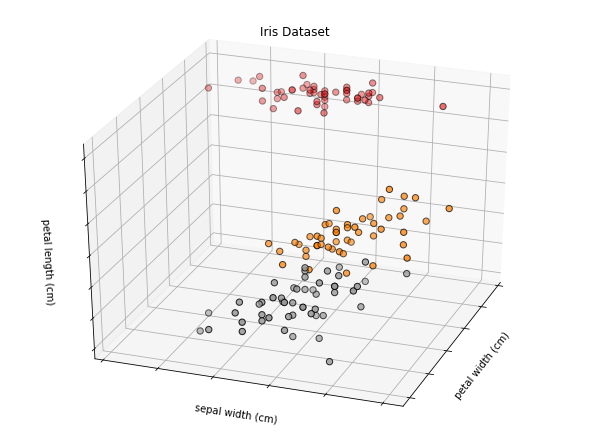

Error Sum of Squares:  100.39574


In [ ]:
plot_Iris_Dataset_2D_3D(iris_X, iris_y)
SSE(iris_X, iris_y)

## **Run with different init methods**

### FORGY APPROACH (FA)

FORGY APPROACH (FA)
0.00273
iterator: 7


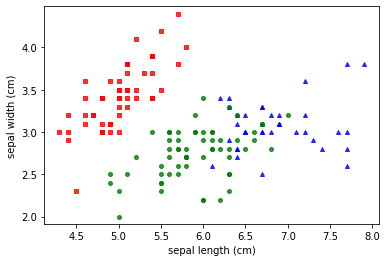

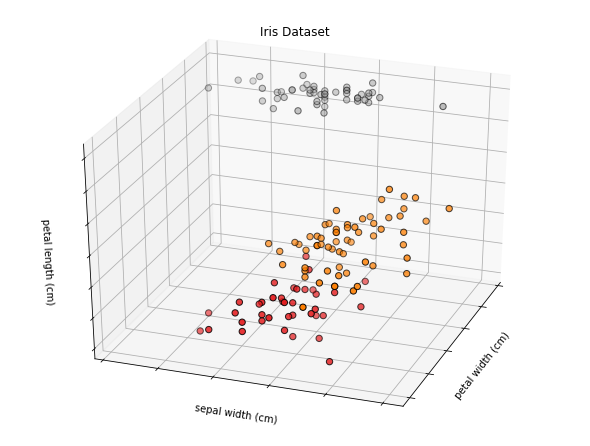

Error Sum of Squares:  97.20457


In [ ]:
centers, labels, it = kmeans(kmeans_init_randomly_centers,iris_X, K=3)
print('iterator:', it)
plot_Iris_Dataset_2D_3D(iris_X, labels)
SSE(iris_X, labels)

### K-MEANS++

K-MEANS++


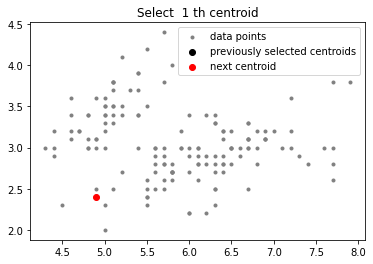

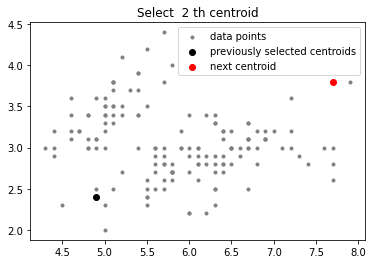

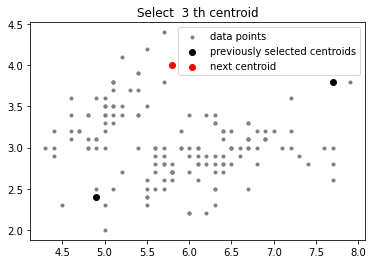

0.58109
iterator: 2


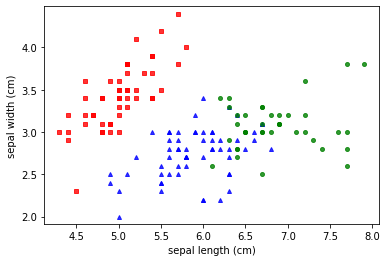

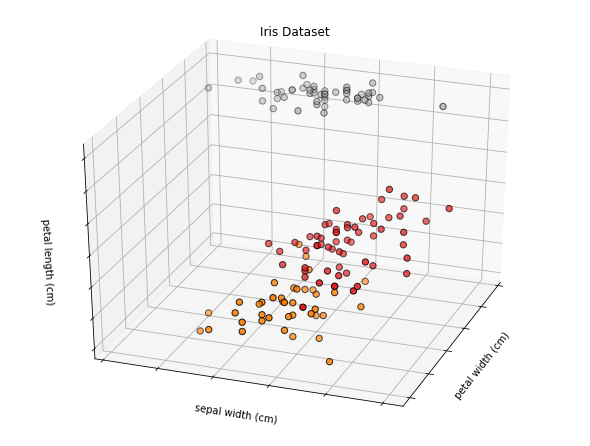

Error Sum of Squares:  97.22487


In [ ]:
centers, labels, it = kmeans(kmeans_init_kmeansPlusPlus,iris_X, K=3)
print('iterator:', it)
plot_Iris_Dataset_2D_3D(iris_X, labels)
SSE(iris_X, labels)

### RANDOM K CLUSTERS

RANDOM K CLUSTERS
0.00337
iterator: 10


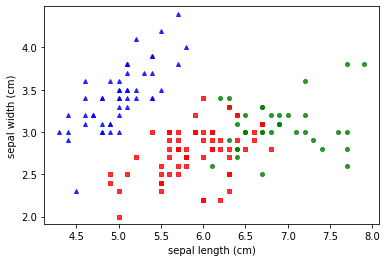

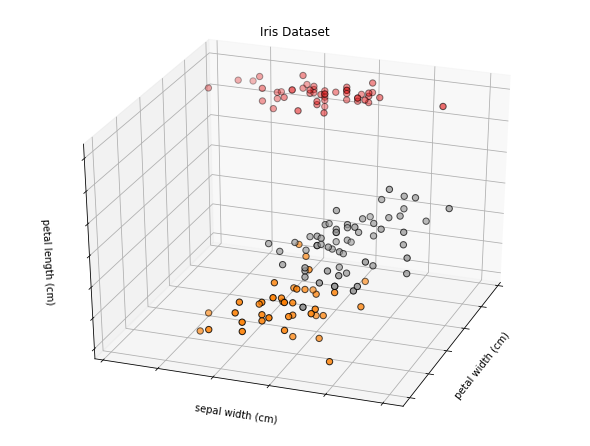

Error Sum of Squares:  97.22487


In [ ]:
centers, labels, it = kmeans(kmeans_init_randomly_k_clusters,iris_X, K=3)
print('iterator:', it)
plot_Iris_Dataset_2D_3D(iris_X, labels)
SSE(iris_X, labels)

### MACQUEEN APPROACH (MA)

MACQUEEN APPROACH (MA)
0.01147
iterator: 5


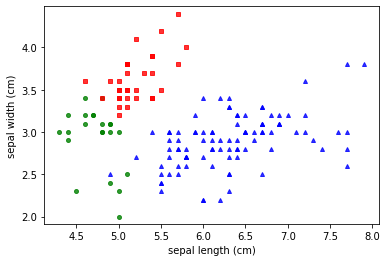

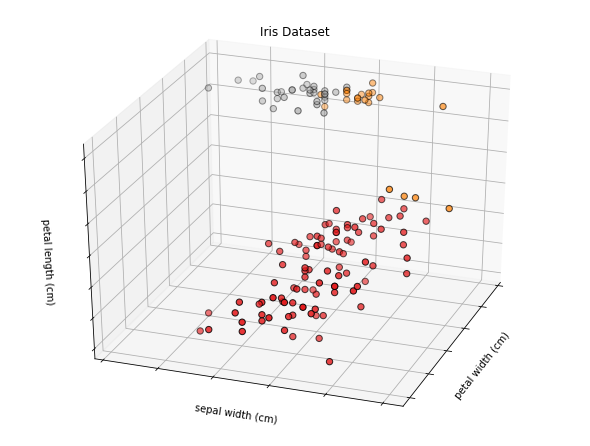

Error Sum of Squares:  124.02237


In [ ]:
centers, labels, it = kmeans(kmeans_init_MA,iris_X, K=3)
print('iterator:', it)
plot_Iris_Dataset_2D_3D(iris_X, labels)
SSE(iris_X, labels)

### KAUFMAN APPROACH (KA) 

KAUFMAN APPROACH (KA)
0.9537
iterator: 3


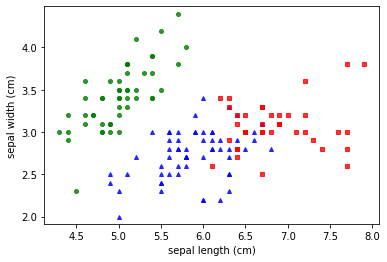

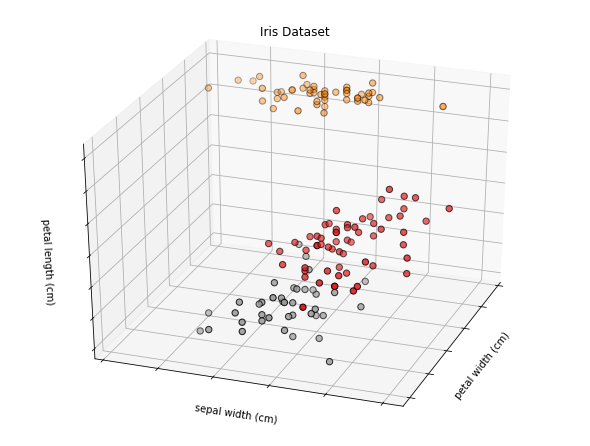

Error Sum of Squares:  97.22487


In [ ]:
centers, labels, it = kmeans(kmeans_init_KA,iris_X, K=3)
print('iterator:', it)
plot_Iris_Dataset_2D_3D(iris_X, labels)
SSE(iris_X, labels)

# **THE MNIST dataset**

## **Load THE MNIST dataset and functions**

In [ ]:
def display_network(A, m = -1, n = -1):
    opt_normalize = True
    opt_graycolor = True

    # Rescale
    A = A - np.average(A)

    # Compute rows & cols
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1
    if m < 0 or n < 0:
        n = np.ceil(np.sqrt(col))
        m = np.ceil(col / n)
        

    image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf)))

    if not opt_graycolor:
        image *= 0.1

    k = 0

    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue

            clim = np.max(np.abs(A[:, k]))

            if opt_normalize:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / clim
            else:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / np.max(np.abs(A))
            k += 1

    return image

def display_MNIST(X, centers, labels):
    A = display_network(centers.T, 10, 1)
    f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
    f1.axes.get_xaxis().set_visible(False)
    f1.axes.get_yaxis().set_visible(False)
    plt.show()

    K = len(centers)
    N0 = 10;
    X1 = np.zeros((N0*K, 784))
    X2 = np.zeros((N0*K, 784))
    for k in range(K):
        Xk = X[labels == k, :]
        center_k = [centers[k]]
        neigh = NearestNeighbors(N0).fit(Xk)
        dist, nearest_id  = neigh.kneighbors(center_k, N0)
        X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
        X2[N0*k: N0*k + N0,:] = Xk[:N0, :]
    plt.axis('off')
    A = display_network(X2.T, K, N0)
    f2 = plt.imshow(A, interpolation='nearest' )
    plt.gray()
    plt.show()

(1000, 784)
(1000,)
Error Sum of Squares:  6093.73051


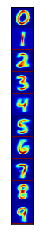

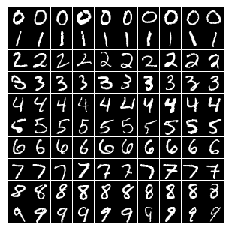

In [ ]:
mndata = MNIST('/content/gdrive/MyDrive/Colab Notebooks/MNIST')
mndata.load_testing()
y = np.asarray(mndata.test_labels)[:1000]
X = np.asarray(mndata.test_images)[:1000,:]/256.0
print(X.shape)
print(y.shape)
SSE(X, y)
centroids = []
for i in range(10):
  cluster = X[y == i]
  centroids.append(np.mean(cluster, axis = 0))
display_MNIST(X, np.array(centroids), y)


## **Run with different init methods**

### FORGY APPROACH (FA)

Lan chay thu 0
FORGY APPROACH (FA)
7e-05
iterator: 28
Error Sum of Squares:  5948.36466
Lan chay thu 1
FORGY APPROACH (FA)
3e-05
iterator: 35
Error Sum of Squares:  5930.80154
Lan chay thu 2
FORGY APPROACH (FA)
3e-05
iterator: 23
Error Sum of Squares:  5986.30158
Lan chay thu 3
FORGY APPROACH (FA)
2e-05
iterator: 11
Error Sum of Squares:  5944.65801
Lan chay thu 4
FORGY APPROACH (FA)
0.00024
iterator: 28
Error Sum of Squares:  5949.78434
Lan chay thu 5
FORGY APPROACH (FA)
0.00018
iterator: 36
Error Sum of Squares:  5939.33009
Lan chay thu 6
FORGY APPROACH (FA)
5e-05
iterator: 21
Error Sum of Squares:  5944.78213
Lan chay thu 7
FORGY APPROACH (FA)
0.00047
iterator: 26
Error Sum of Squares:  5950.68106
Lan chay thu 8
FORGY APPROACH (FA)
3e-05
iterator: 13
Error Sum of Squares:  5940.19666
Lan chay thu 9
FORGY APPROACH (FA)
0.00023
iterator: 25
Error Sum of Squares:  5948.68129


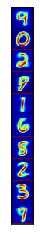

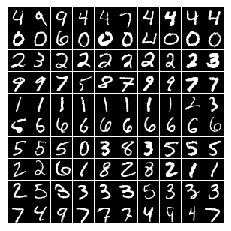

In [ ]:
for i in range(10):
  print('Lan chay thu '+ str(i))
  centers, labels, it = kmeans(kmeans_init_randomly_centers,X, K=10)
  print('iterator:', it)
  SSE(X, labels)
  if i == 9:
    display_MNIST(X, centers, labels)

### K-MEANS++

Lan chay thu 0
K-MEANS++
5.80787
iterator: 14
Error Sum of Squares:  5970.27892
Lan chay thu 1
K-MEANS++
5.8044
iterator: 20
Error Sum of Squares:  5949.63511
Lan chay thu 2
K-MEANS++
5.81957
iterator: 17
Error Sum of Squares:  5960.85604
Lan chay thu 3
K-MEANS++
5.80238
iterator: 36
Error Sum of Squares:  5948.46895
Lan chay thu 4
K-MEANS++
5.82219
iterator: 20
Error Sum of Squares:  5950.7241
Lan chay thu 5
K-MEANS++
5.77378
iterator: 18
Error Sum of Squares:  5930.01169
Lan chay thu 6
K-MEANS++
5.79221
iterator: 20
Error Sum of Squares:  5959.11726
Lan chay thu 7
K-MEANS++
5.79412
iterator: 20
Error Sum of Squares:  5949.63511
Lan chay thu 8
K-MEANS++
5.82603
iterator: 15
Error Sum of Squares:  5956.65392
Lan chay thu 9
K-MEANS++
5.8484
iterator: 26
Error Sum of Squares:  5954.36164


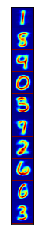

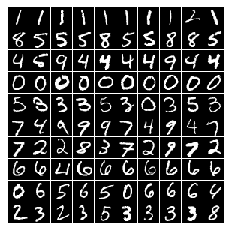

In [ ]:
for i in range(10):
  print('Lan chay thu '+ str(i))
  centers, labels, it = kmeans(kmeans_init_kmeansPlusPlus,X, K=10)
  print('iterator:', it)
  SSE(X, labels)
  if i == 9:
    display_MNIST(X, centers, labels)

### RANDOM K CLUSTERS

Lan chay thu 0
RANDOM K CLUSTERS
0.00855
iterator: 17
Error Sum of Squares:  5930.54942
Lan chay thu 1
RANDOM K CLUSTERS
0.00532
iterator: 32
Error Sum of Squares:  5939.19303
Lan chay thu 2
RANDOM K CLUSTERS
0.00556
iterator: 19
Error Sum of Squares:  5941.84328
Lan chay thu 3
RANDOM K CLUSTERS
0.00305
iterator: 19
Error Sum of Squares:  5961.64956
Lan chay thu 4
RANDOM K CLUSTERS
0.0051
iterator: 36
Error Sum of Squares:  5935.9937
Lan chay thu 5
RANDOM K CLUSTERS
0.00479
iterator: 22
Error Sum of Squares:  5927.30175
Lan chay thu 6
RANDOM K CLUSTERS
0.0051
iterator: 36
Error Sum of Squares:  5964.12458
Lan chay thu 7
RANDOM K CLUSTERS
0.00383
iterator: 24
Error Sum of Squares:  5941.10948
Lan chay thu 8
RANDOM K CLUSTERS
0.00299
iterator: 14
Error Sum of Squares:  5949.79917
Lan chay thu 9
RANDOM K CLUSTERS
0.00415
iterator: 14
Error Sum of Squares:  5948.94864


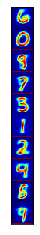

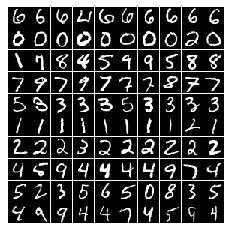

In [ ]:
for i in range(10):
  print('Lan chay thu '+ str(i))
  centers, labels, it = kmeans(kmeans_init_randomly_k_clusters,X, K=10)
  print('iterator:', it)
  SSE(X, labels)
  if i == 9:
    display_MNIST(X, centers, labels)

### MACQUEEN APPROACH (MA)

MACQUEEN APPROACH (MA)
1.33393
(10, 784)
-----------------------
(1000,)
iterator: 12
Error Sum of Squares:  5923.22331


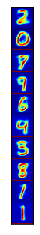

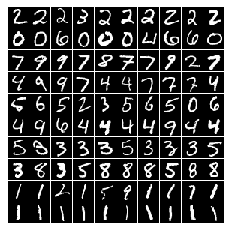

In [ ]:
centers, labels, it = kmeans(kmeans_init_MA,X, K=10)
print(centers.shape)
print('-----------------------')
print(labels.shape)
print('iterator:', it)
SSE(X, labels)
display_MNIST(X, centers, labels)

### KAUFMAN APPROACH (KA)

KAUFMAN APPROACH (KA)
265.96389
iterator: 5
Error Sum of Squares:  1139.26754


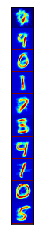

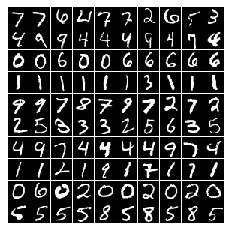

In [ ]:
centers, labels, it = kmeans(kmeans_init_KA,X[:200,:], K=10)
print('iterator:', it)
SSE(X[:200,:], labels)
display_MNIST(X[:200,:], centers, labels)